Regression functions

In [2]:
import numpy as np
import pandas as pd
from math import sqrt
from numpy import linalg
import scipy.stats as stats
import matplotlib.pyplot as plt
# Global parameters for plt graphics
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = [10,6]


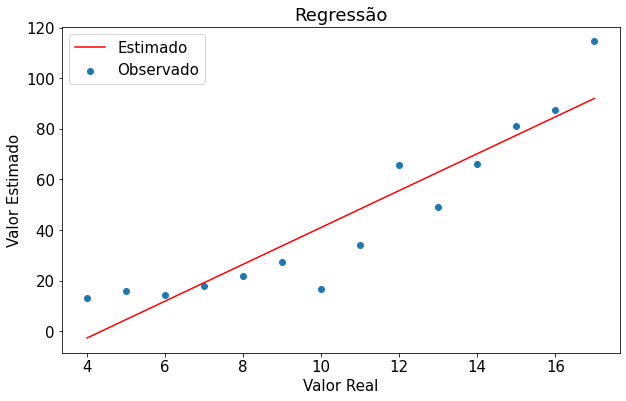

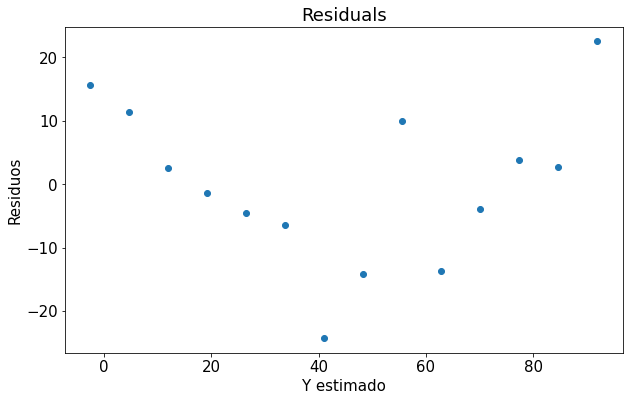

,residuals,hat_diag,standarized,studentized,studen_ext
0,15.5914,0.2571,1.1893,1.1919,1.4350
1,11.4147,0.2044,0.8707,0.8727,0.9742
2,2.5380,0.1604,0.1936,0.1941,0.2033
3,-1.4387,0.1253,-0.1097,-0.1100,-0.1128
4,-4.5154,0.0989,-0.3444,-0.3453,-0.3504
5,-6.3921,0.0813,-0.4876,-0.4889,-0.4937
6,-24.2688,0.0725,-1.8512,-1.8562,-2.1829
7,-14.1455,0.0725,-1.0790,-1.0819,-1.1325
8,9.9778,0.0813,0.7611,0.7631,0.7821
9,-13.6989,0.0989,-1.0449,-1.0477,-1.1106


In [18]:
class Linear_Regression:
    """Ordnary least Square regression"""
    def __init__(self):
        # fit attributes
        self._fit = False
        self.y = None
        self.X_init = None
        self.X = None
        self.constant = False
        self.p = None
        self.n = None
        
        # estimation attributes
        self.hat_matrix = None
        self.betas = None
        self.y_hat = None
       
        # Residual analysis attributes
        self.res = None
        self.QMres = None
        self.res_std = None
        self.hat_diag = None
        self.res_stdt = None
        self.res_stdte = None
        self.S2 = None
        self.res_analysis = None
        
    def __str__(self):
        s  = f'Betas:\n {np.round(self.betas,2)}\n'
        return s 
        
    def fit(self, y, X, add_constant = True):
        """Set the variables and returns the estimation"""
        self.y = y
        self.X_init = X
        
        # if simple linear regression and X is unidimension
        # adjusts X shape to bidimensional
        if len(X.shape) == 1:
            X = np.reshape(X,newshape = (len(X),1))
        
        # adds the constant column if True
        if add_constant == True:
            self.contant = True
            self.X = np.append(np.ones((X.shape[0], 1)), X, axis = 1)
        else:
            self.X = X
        # n is the number of observations and is the number of rows in the X matrix
        self.n = X.shape[0]
        # P is the number of regressors and is the number of columns in the X matrix
        self.p = X.shape[1]
            
        return self._estimation()
        
    def _estimation(self):
        """Runs the estimation"""
        
        # semi hat matrix, is useful because can give us the hat matrix
        # and the beta estimations
        self._XX = linalg.inv(self.X.T @ self.X) @ self.X.T
        
        # the semi hat multiplied by right with the y vector returns the beta estimations
        self.betas =  self._XX @ self.y
        
        # the semi hat multiplied by left with the X matrix returns the hat matrix
        # the hat matrix maps the vector of observed independent variables
        # to a vector of estimations of the dependent variable
        self.hat_matrix = self.X @ self._XX
        
        # estimating observations
        self.y_hat = self.hat_matrix @ self.y
        # estimating the residuals
        self.res = self.y - self.y_hat
        self.res = self.res.reshape((self.n,1))
        
        # changing the fit flag
        self._fit = True
        
        return self.betas
        
    def residual_analysis(self):
        '''residual analysis'''
        # h: hat_diag is the diagonal of X matrix
        self.hat_diag = np.diagonal(self.hat_matrix).reshape((self.n,1))
        
        # d: res_std standirized residuals
        self.QMres = (self.res**2).sum()/(self.n - self.p-1)
        self.res_std = self.res / self.QMres**(1/2)
        

        # r: res_stdt is the studentized residuals
        self.res_stdt = self.res / (((self.QMres - (1-self.hat_diag))**(1/2)).reshape((self.n,1)))
        
        
        # S2: S2 is the model variance without the ith observation
        # t: res_stdte studentized residuals exterior, considers S2 and standart deviation item by item
        self.S2 = ((self.n- self.p)*self.QMres - (self.res**2 / (1 - self.hat_diag))) / (self.n-self.p-1)
        self.res_stdte = self.res / (self.S2*(1-self.hat_diag))**(1/2)
        
        # residual analysis data frame
        self.res_analysis = np.concatenate([self.res,self.hat_diag,self.res_std,self.res_stdt,self.res_stdte], axis = 1)
        self.res_analysis = pd.DataFrame(self.res_analysis, 
                                         columns = ['residuals', 'hat_diag', 'standarized', 'studentized', 'studen_ext'])
        return self.res_analysis.round(4)
    
    def plot(self):
        plt.scatter(self.X_init,self.y, label = 'Observado')
        plt.plot(self.X_init,self.betas[0] + self.betas[1]*self.X_init,color = 'red', label = 'Estimado')
        plt.title('Regressão')
        plt.xlabel('Valor Real')
        plt.ylabel('Valor Estimado')
        plt.legend()
        plt.show()
        
        plt.scatter(self.y_hat,self.res)
        plt.title('Residuals')
        plt.xlabel('Y estimado')
        plt.ylabel('Residuos')
        plt.show()
        return 0

df = pd.read_csv(r'garrafas.csv', sep =';')
y = df.loc[:,['defeitos']].to_numpy()
X = df.loc[:,['semanas']].to_numpy()

model = Linear_Regression()
model.fit(y = y, X = X, add_constant = True)
model.plot()
model.residual_analysis()

In [37]:
df = pd.read_csv(r'garrafas.csv', sep =';')
y = df.loc[:,['defeitos']].to_numpy()
X = df.loc[:,['semanas']].to_numpy()

X = np.concatenate([X, X**2], axis = 1)

model = Linear_Regression()
model.fit(y = y, X = X, add_constant = True)
# model.plot()
model.residual_analysis()

,residuals,hat_diag,standarized,studentized,studen_ext
0,-2.0943,0.4893,-0.2598,-0.2608,-0.3499
1,1.8916,0.2717,0.2346,0.2360,0.2641
2,-0.1829,0.1659,-0.0227,-0.0228,-0.0238
3,1.2822,0.1308,0.1590,0.1601,0.1635
4,2.2868,0.1332,0.2836,0.2855,0.2928
5,3.1310,0.1486,0.3883,0.3909,0.4060
6,-13.3853,0.1604,-1.6602,-1.6710,-2.0354
7,-3.2620,0.1604,-0.4046,-0.4072,-0.4262
8,19.5009,0.1486,2.4187,2.4347,3.8391
9,-6.8967,0.1332,-0.8554,-0.8612,-0.9124


In [36]:
df = pd.read_csv(r'garrafas.csv', sep =';')
y = df.loc[:,['defeitos']].to_numpy()
X = df.loc[:,['semanas']].to_numpy()

X = np.concatenate([X, X**2], axis = 1)
X

array([[  4,  16],
       [  5,  25],
       [  6,  36],
       [  7,  49],
       [  8,  64],
       [  9,  81],
       [ 10, 100],
       [ 11, 121],
       [ 12, 144],
       [ 13, 169],
       [ 14, 196],
       [ 15, 225],
       [ 16, 256],
       [ 17, 289]], dtype=int64)